In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename='/content/drive/My Drive/DataSet/Lpoint/data/Product.csv'

In [4]:
prd = pd.read_csv(filename, dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
prd.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2
2,4142395,06158159,85,179538,(not set),[아베다],39000,1
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1
4,4144917,06406509,78,190306,5개,데코르테,39000,5


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [6]:
prd.dtypes
prd.shape

CLNT_ID      object
SESS_ID      object
HITS_SEQ      int64
PD_C          int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM     int64
PD_BUY_CT     int64
dtype: object

(5024906, 8)

### 1.Product 
#### 1.1 Product 내 변수만으로 알아볼 수 있는 것들 
1. 연속형 변수 3개(HITS_SEQ, PD_BUY_AM, PD_BUY_CT)의 각 각의 기술통계
2. PD_BUY_AM * PD_BUT_CT = 총구매가격 변수 추가하여 기술통계
3. 총구매가격과 HITS_SEQ의 상관관계(보통 가격이 높은 상품이 관여도가 높기 때문에 소비 이전에 정보검색량이 많다. 따라서 구매까지의 홈페이지 내 클릭 수를 보여주는 HITS_SEQ과 총구매 가격 간의 상관관계를 본다. H1:많이 살펴볼 수록 총구매가격이 높다.)
4. 생각나면 추가






In [7]:
prd['TOT_PRICE'] = prd['PD_BUY_AM']*prd['PD_BUY_CT'] #변수 추가
prd.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1,39000
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000
2,4142395,06158159,85,179538,(not set),[아베다],39000,1,39000
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000
4,4144917,06406509,78,190306,5개,데코르테,39000,5,195000


In [8]:
hit_price_cor = prd[['HITS_SEQ', 'TOT_PRICE']] #또는 prd.loc[;,['HITS_SEQ', 'TOT_PRICE']]
hit_price_cor.head()

,HITS_SEQ,TOT_PRICE
0,12,39000
1,13,78000
2,85,39000
3,12,39000
4,78,195000


In [9]:
hit_price_cor.corr(method='pearson') #왓더 -0.025

,HITS_SEQ,TOT_PRICE
HITS_SEQ,1.000000,-0.025467
TOT_PRICE,-0.025467,1.000000


In [10]:
des = prd[['HITS_SEQ','PD_BUY_AM','PD_BUY_CT','TOT_PRICE']].describe()
pd.options.display.float_format = '{:.2f}'.format #소수점 두번째까지 표시
des

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
count,5024906.00,5024906.00,5024906.00,5024906.00
mean,81.26,51349.45,1.18,54089.34
std,85.94,117383.57,3.07,127671.25
min,1.00,10.00,1.00,10.00
25%,24.00,12900.00,1.00,14000.00
50%,50.00,28000.00,1.00,29000.00
75%,104.00,49900.00,1.00,53000.00
max,500.00,17779000.00,1440.00,39000000.00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


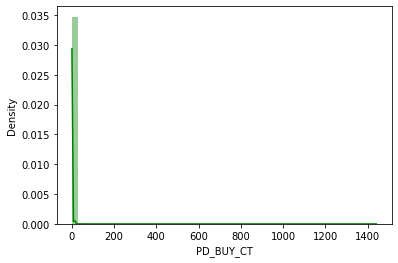

In [26]:
sns.distplot(prd['PD_BUY_CT'], color="green")

In [ ]:
# 11.9 히스토그램 정규화해서 시각화 좀 제대로. 표로는 한 눈에 안들어옴. 

### 1.Product_2
#### 1.2 Product와 join할 수 있는 것들 
##### Access를 통해 쿼리를 쉽게 짜면서 꿀빨려고 했으나 이렇게 큰 데이터셋은 감당이 되지 않아 빨리 SQL을 조금이라도 배워서 하지 않는 이상 파이썬으로 해야할 듯. 

1. Product*Master : PD_C 기준으로 병합이 가능함. 품목별 구매 가격과 양, Hit 수 등을 알 수 있음. 
2. Product*Custom : CLNT_ID 기준으로 병합이 가능함. 구매 이력에 더해 고객에 대한 정보를 더 상세하게 할 수 있음. 
3. Product*Session : CLNT_ID, SESS_ID 
4. Product^Search1 : 


##### 1. Product*Master
###### 대분류(CLAC1_NM)도 37개나 되기 때문에 줄일 필요가 있다.

In [ ]:
#11.9
#어떤 기준으로 대대분류를 추가하면 좋을지 찾아봐야함. 네이버 쇼핑도 좋은데 더 공식적인 것이면 좋을 것 같음. 
#

In [ ]:
p